# Exploratory Data Analysis

# Task 1

# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets

In [10]:
customers = pd.read_csv(r"C:/Users/ADMIN/Downloads/Customers.csv")
products = pd.read_csv(r"C:/Users/ADMIN/Downloads/Products.csv")
transactions = pd.read_csv(r"C:/Users/ADMIN/Downloads/Transactions.csv")


In [11]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [12]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [13]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [15]:
print(customers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [16]:
print(products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [17]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


# descriptive stats for all

In [19]:
print(customers.describe(include='all'))

print(products.describe(include='all'))

print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          N

In [20]:
# Missing Value Analysis
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Visual 1: Product Categories Breakdown

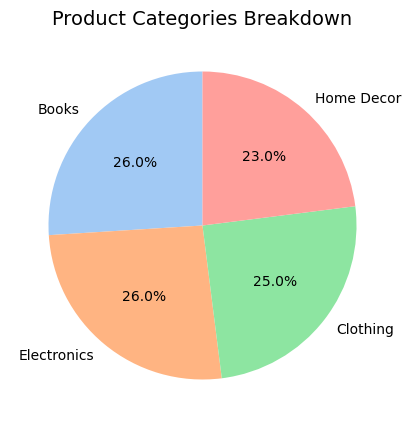

In [31]:
# Product category distribution
category_distribution = products['Category'].value_counts()

plt.figure(figsize=(8, 5))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Product Categories Breakdown", fontsize=14)
plt.ylabel("")  # Hide the y-label for better aesthetics
plt.show()

# Visual 2: Distribution of Customers by Region

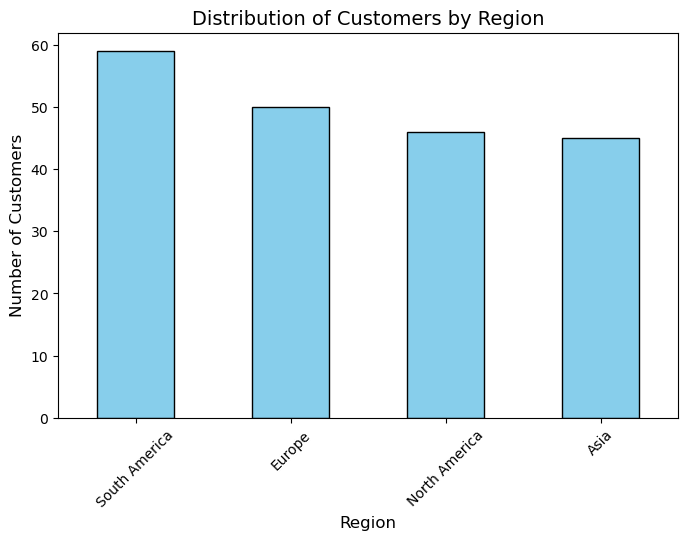

In [21]:
# Count of customers by region
region_distribution = customers['Region'].value_counts()

plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Customers by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Visual 3: Top 5 Most Purchased Products

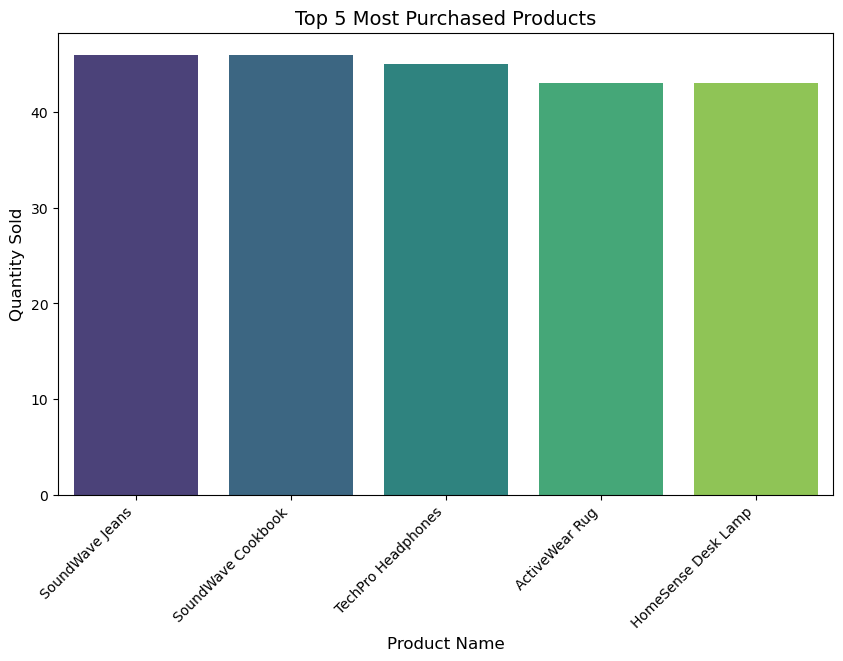

In [33]:
# Top 10 products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)

top_products = top_products.reset_index()

# Merge with products data to get product names
top_products = top_products.merge(products, on='ProductID')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')
plt.title("Top 5 Most Purchased Products", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


# Visual 4: Customer Signup Trend Over Time



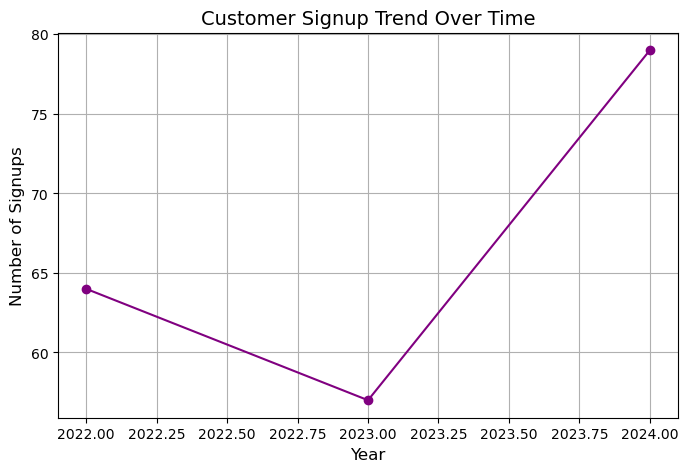

In [24]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8, 5))
signup_trend.plot(kind='line', marker='o', color='purple')
plt.title("Customer Signup Trend Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.grid()
plt.show()


# Visual 5: Monthly Transaction Trends
    

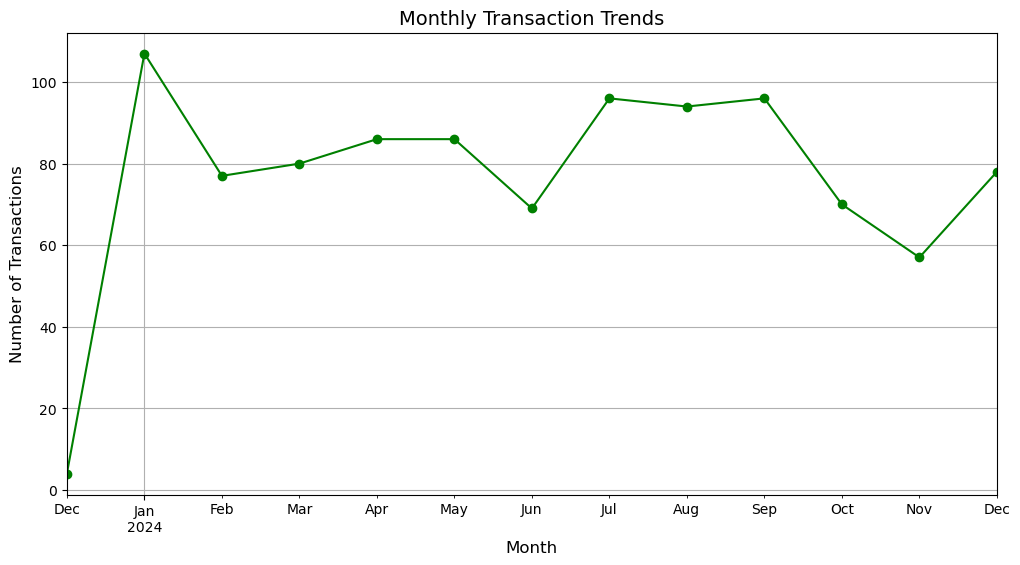

In [25]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthly_trend = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='green')
plt.title("Monthly Transaction Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid()
plt.show()
